In [1]:
!pip install qiskit qiskit-ibm-runtime pylatexenc qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.3/347.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.2 MB/s eta 0:00:00
   ━━━━━━

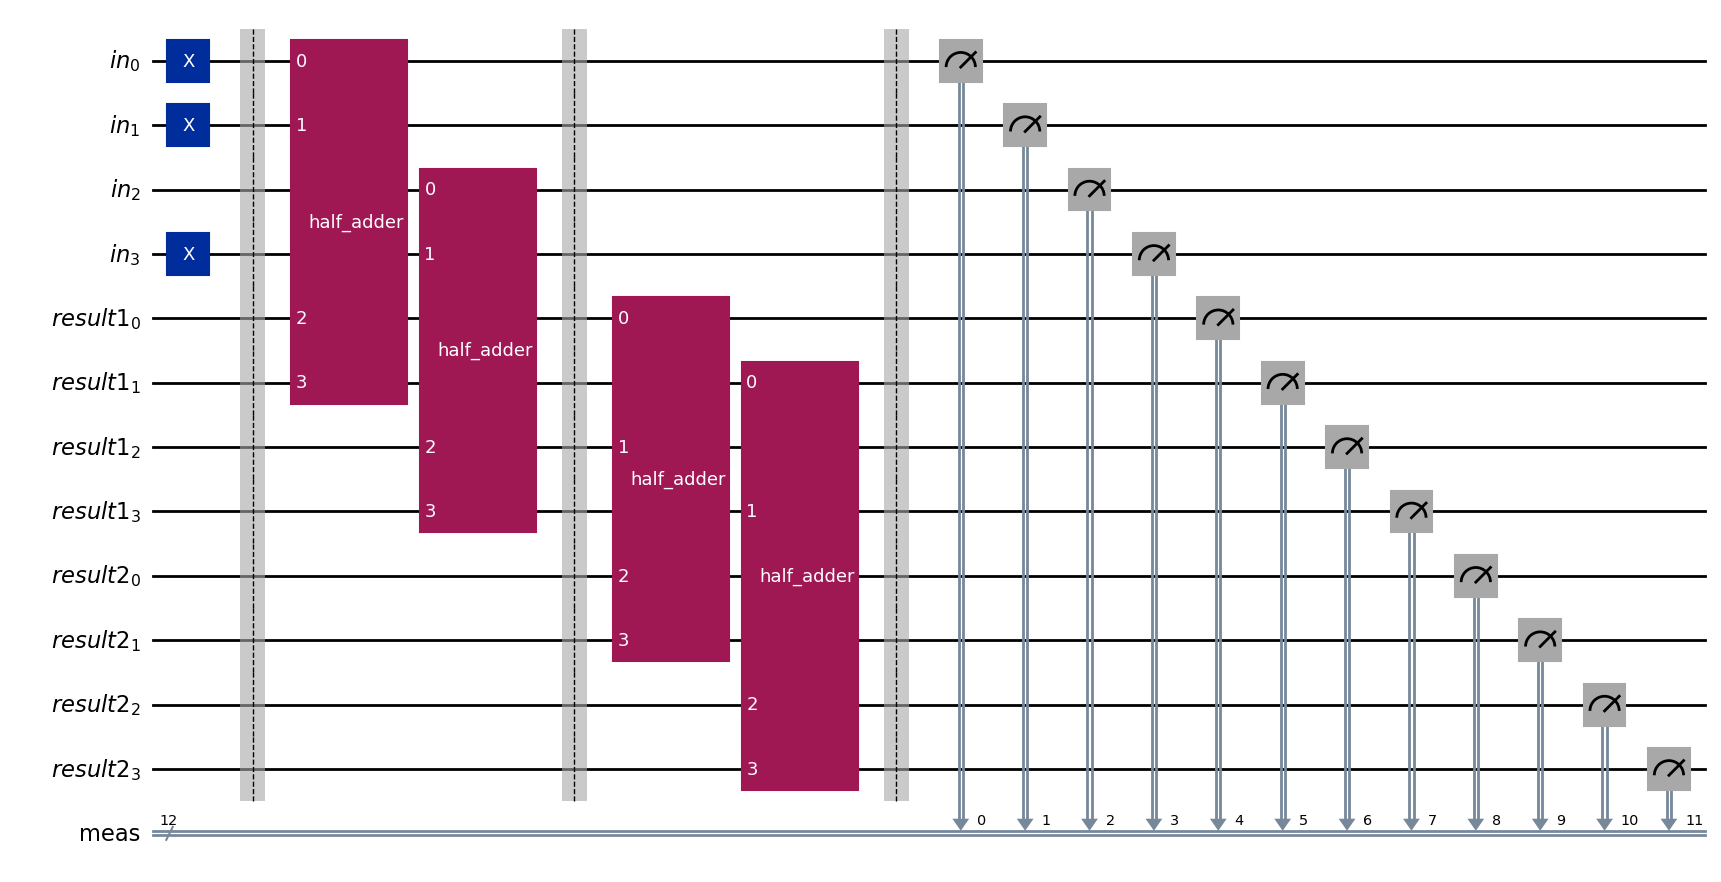

In [2]:
# 제출 시 화일이름 : lab02학생이름.ipynb

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

def half_adder(n):
  qr = QuantumRegister(n)
  circuit = QuantumCircuit(qr)
  circuit.cx(qr[0], qr[2])
  circuit.cx(qr[1], qr[2])
  circuit.ccx(qr[0], qr[1], qr[3])
  circuit.name = 'half_adder'
  return circuit

input = QuantumRegister(4, 'in')
r1 = QuantumRegister(4, 'result1')
r2 = QuantumRegister(4, 'result2')

circuit = QuantumCircuit(input, r1, r2)

circuit.x([input[0],input[1],input[3]])
circuit.barrier()
circuit.append(half_adder(4), [0,1,4,5])
circuit.append(half_adder(4), [2,3,6,7])
circuit.barrier()
circuit.append(half_adder(4), [4,6,8,9])
circuit.append(half_adder(4), [5,7,10,11])
circuit.measure_all()

circuit.draw(output='mpl')


In [3]:
# AerSimulator 를 이용하여 circuit 회로를 측정한 결과를 출력
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)

isa_circuit = pm.run(circuit)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1000)
result = job.result()
count = result[0].data.meas.get_counts()
print (count)
key = str(list(count.keys())[0])
print(f'result2={key[:2]} and {key[2:4]} result1={key[4:6]} and {key[6:8]} input={key[8:10]} and {key[10:]}')

{'010101101011': 1000}
result2=01 and 01 result1=01 and 10 input=10 and 11


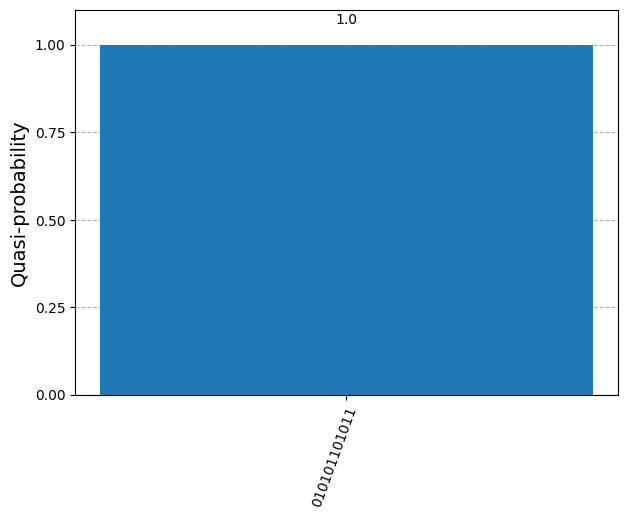

In [4]:
from qiskit.visualization import plot_distribution
plot_distribution(count)
